In [1]:

import numpy as np
import glob
import pandas as pd

path = 'C:/Users/ZHT/Documents/dataProcess/smogEyes'
files  = glob.glob(path + '/*.json') 
smog_eye=[]

for file in files:
    data = pd.read_json(file)
    data['SystemTimeStamp'] = pd.to_datetime(data['SystemTimeStamp'],unit='ms').astype('int64')
    data['SystemTimeStamp'] = data['SystemTimeStamp']/1000000
    filedata = {'filename':file, 'df':data}
    print(filedata['filename'])
    print(filedata['df'].shape)
    smog_eye.append(filedata)

C:/Users/ZHT/Documents/dataProcess/smogEyes\HY-08-25-16-55-00-2024.json
(15137, 11)
C:/Users/ZHT/Documents/dataProcess/smogEyes\Jia-08-26-10-07-12-2024.json
(20875, 11)
C:/Users/ZHT/Documents/dataProcess/smogEyes\Lin-08-25-13-37-36-2024.json
(30687, 11)
C:/Users/ZHT/Documents/dataProcess/smogEyes\Xiaochun-08-26-17-39-21-2024.json
(45121, 11)
C:/Users/ZHT/Documents/dataProcess/smogEyes\Ziyi-08-26-18-49-27-2024.json
(17412, 11)


In [2]:
import numpy as np
import glob
import pandas as pd

path = 'C:/Users/ZHT/Documents/dataProcess/Smog_frame'
files  = glob.glob(path + '/*.json') 
smog_frame=[]

for file in files:
    framedata = pd.read_json(file)
    framedata['timeStamp'] = pd.to_datetime(framedata['timeStamp'],unit='ms').astype(np.int64)
    framedata['timeStamp'] = framedata['timeStamp']/1000000
    filedata = {'filename':file, 'df':framedata}
    print(filedata['filename'])
    print(filedata['df'].shape)
    smog_frame.append(filedata)

print('length of targetpos',len (smog_frame[0]['df']['targetpos'][0]))
print('length of cannonpos',len (smog_frame[0]['df']['cannonpos'][0]))
print('length of ponPos',len(smog_frame[0]['df']['ponPos'][1120]))
#print(smog_frame[2]['df']['timeStamp'])

C:/Users/ZHT/Documents/dataProcess/Smog_frame\HY-08-25-16-55-01-2024.json
(8398, 5)
C:/Users/ZHT/Documents/dataProcess/Smog_frame\Jia-08-26-10-07-13-2024.json
(11605, 5)
C:/Users/ZHT/Documents/dataProcess/Smog_frame\Lin-08-25-13-37-38-2024.json
(16983, 5)
C:/Users/ZHT/Documents/dataProcess/Smog_frame\Xiaochun-08-26-17-39-24-2024.json
(25009, 5)
C:/Users/ZHT/Documents/dataProcess/Smog_frame\Ziyi-08-26-18-49-28-2024.json
(9687, 5)
length of targetpos 8
length of cannonpos 3
length of ponPos 7


In [3]:

import numpy as np
import glob
import pandas as pd

path = 'C:/Users/ZHT/Documents/dataProcess/smogEyes/NH'
files  = glob.glob(path + '/*.json') 
NH=[]
for file in files:
    NHdata = pd.read_json(file)
    filedata = {'filename':file, 'df':NHdata}
    print(filedata['filename'])
    print(filedata['df'].shape)
    NH.append(filedata)
#0 for Left, 1 for Right

C:/Users/ZHT/Documents/dataProcess/smogEyes/NH\smogLrunNH.json
(5, 10)
C:/Users/ZHT/Documents/dataProcess/smogEyes/NH\smogRrunNH.json
(5, 10)


individual 0:  C:/Users/ZHT/Documents/dataProcess/Smog_frame\HY-08-25-16-55-01-2024.json 
		 C:/Users/ZHT/Documents/dataProcess/smogEyes\HY-08-25-16-55-00-2024.json
[1724575931687.0, 1724575931712.0, 1724575931729.9998]
[1724575931959.0, 1724575931967.0, 1724575931977.9998]
individual 1:  C:/Users/ZHT/Documents/dataProcess/Smog_frame\Jia-08-26-10-07-13-2024.json 
		 C:/Users/ZHT/Documents/dataProcess/smogEyes\Jia-08-26-10-07-12-2024.json
[1724637799387.0, 1724637799412.0, 1724637799430.0002]
[1724637799659.0, 1724637799668.0, 1724637799679.0]
individual 2:  C:/Users/ZHT/Documents/dataProcess/Smog_frame\Lin-08-25-13-37-38-2024.json 
		 C:/Users/ZHT/Documents/dataProcess/smogEyes\Lin-08-25-13-37-36-2024.json
[1724563914470.0002, 1724563915020.0, 1724563915054.0002]
[1724563914735.0, 1724563914745.0, 1724563914755.0]
individual 3:  C:/Users/ZHT/Documents/dataProcess/Smog_frame\Xiaochun-08-26-17-39-24-2024.json 
		 C:/Users/ZHT/Documents/dataProcess/smogEyes\Xiaochun-08-26-17-39-21-2024.js

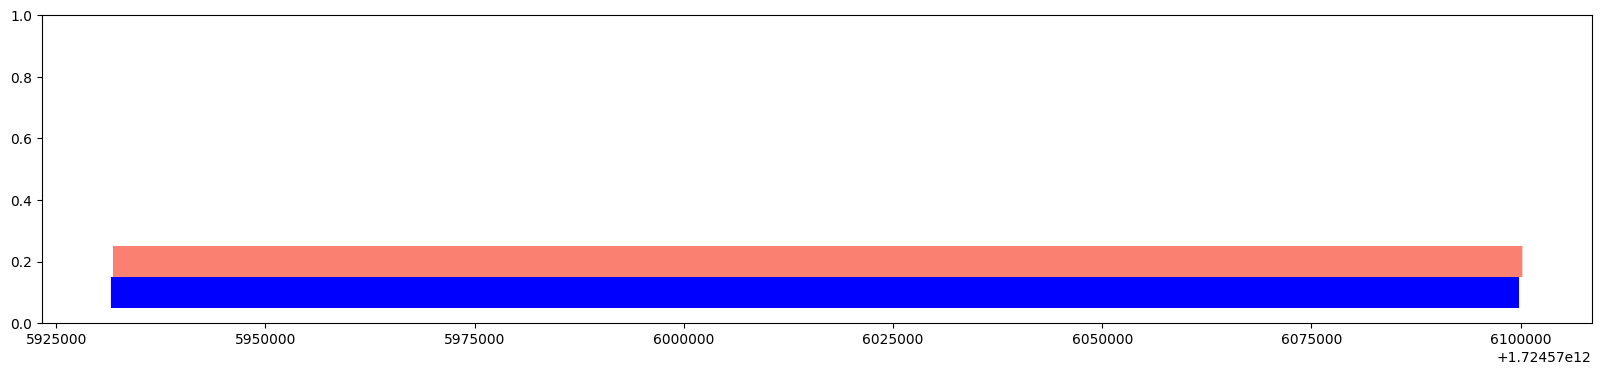

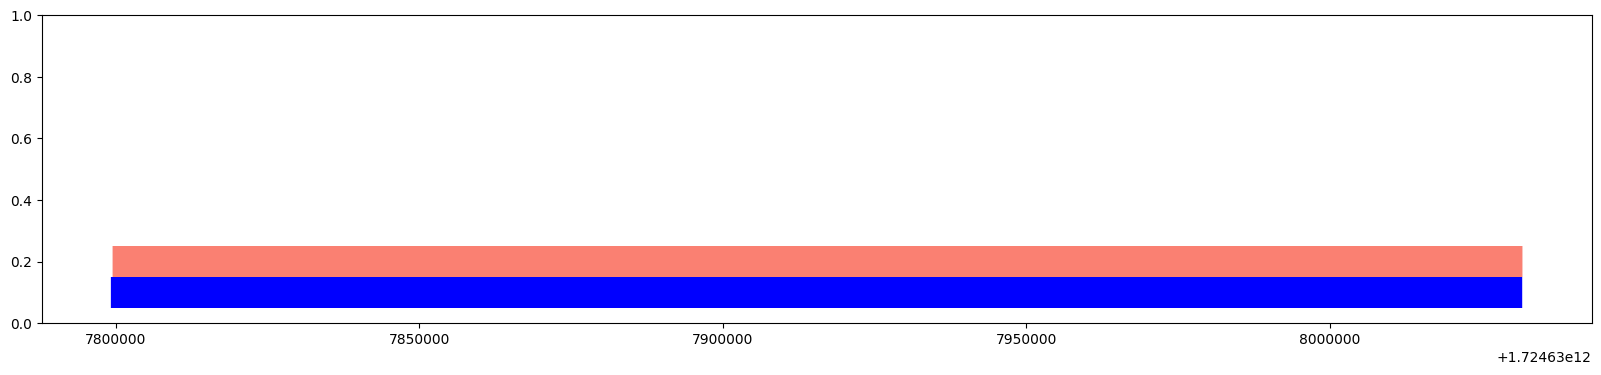

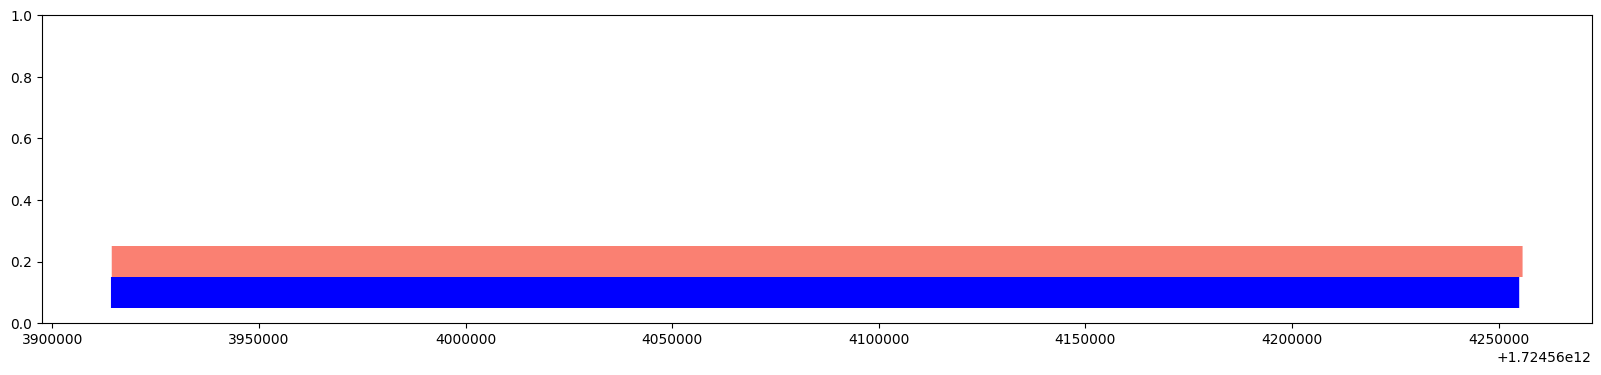

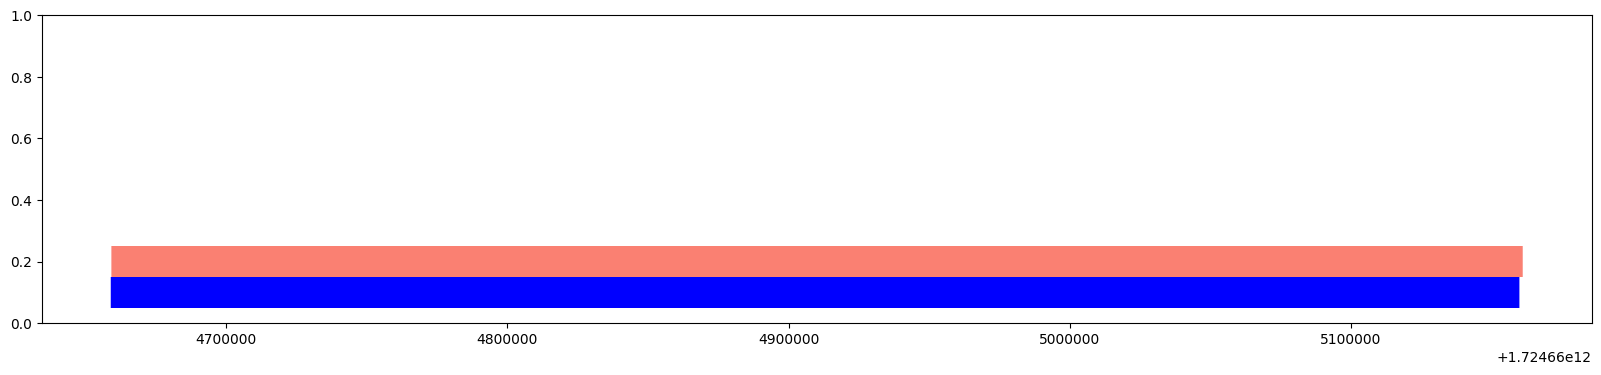

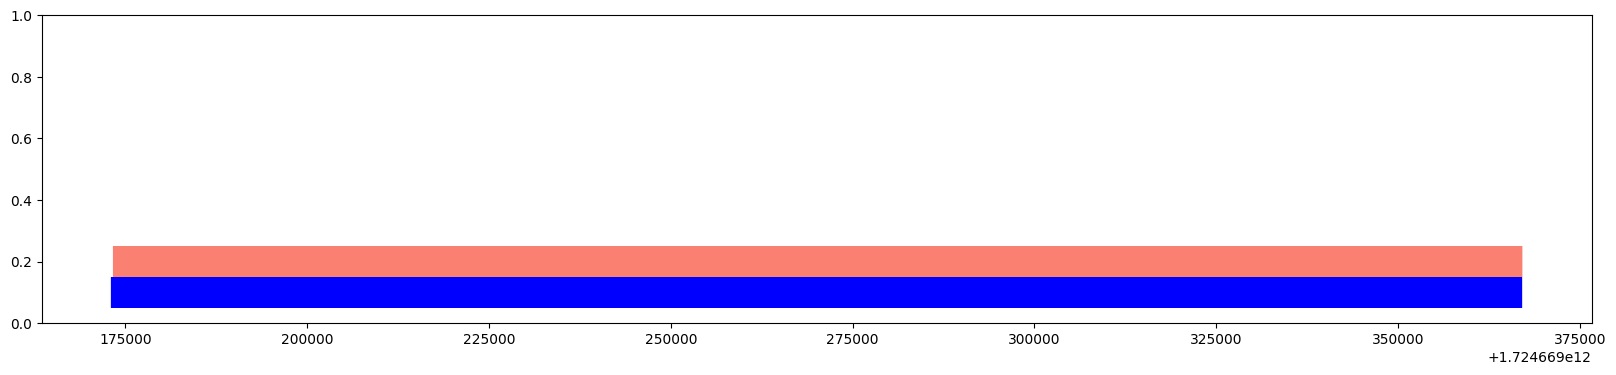

In [4]:
import matplotlib.pyplot as plt
#检查时间戳是否对齐无误
for individual in range(len(smog_frame)):
    print(f'individual {individual}: ',smog_frame[individual]['filename'],'\n\t\t',smog_eye[individual]['filename'])
    teye = smog_eye[individual]['df']['SystemTimeStamp'].to_list()
    eye = teye.copy()
    tframe = smog_frame[individual]['df']['timeStamp'].to_list()
    frame = tframe.copy()
    print(frame[:3])
    print(eye[:3])
    fig = plt.figure(figsize=(20, 4))
    plt.eventplot(eye,linelengths=0.1,colors='salmon', lineoffsets=0.2)
    plt.eventplot(frame,linelengths=0.1,colors='blue', lineoffsets=0.1)
    plt.ylim(0,1)
    plt.xlim()


In [5]:
#individual = 

def defineData(individual):
    df = smog_eye[individual]['df'].copy()
    data = df
    data.dropna(inplace=True)
    data['L_X'] = (data['LeftGazeX'] * 1920).round(0)
    data['L_Y'] = ((1-data['LeftGazeY'])*1080).round(0)
    data['SystemTimeStamp'] = data['SystemTimeStamp']
    data['R_X'] = (data['RightGazeX'] * 1920).round(0)
    data['R_Y'] = ((1-data['RightGazeY'])*1080).round(0)
    data.drop(columns=['LeftGazeX','LeftGazeY','RightGazeX','RightGazeY','TrailTag','FrameTag','isGrey','Validity'], inplace=True)
    data['LeftPupilSize'] = data['LeftPupilSize'].round(2)
    data['RightPupilSize'] = data['RightPupilSize'].round(2)
    return data

def rawdata(individual):
    data = defineData(individual).copy()
    data = data[(data['L_X'] > 0) & (data['L_Y'] > 0) & (data['R_X'] > 0) & (data['R_Y'] > 0) & 
            (data['L_X'] < 1920) & (data['L_Y'] < 1080) &
            (data['R_X'] < 1920) & (data['R_Y'] < 1080)]
    return data

def savedata(filename,data):
    data.to_csv(f'{filename}', sep='\t', index=False,lineterminator='\n')


import matplotlib.pyplot as plt
def plotL(toplt):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    toplt['t'] = toplt['SystemTimeStamp']-min(toplt['SystemTimeStamp'])
    print('duration(ms): ',max(toplt['t']),'minLX(px): ', min(toplt['L_X']))
    ax.scatter(toplt['L_X'],toplt['L_Y'],s=0.1)



In [6]:
def findpon(individual):
    df = smog_frame[0]['df'].copy()
    df = df[df['ponPos'].apply(len) == 7]
    return df


def splitXYtar(individual,Xi):
    newdf = smog_frame[individual]['df'].copy()
    newdf.drop(columns=['cannonpos','ponPos'], inplace=True)
    newtargetpos = newdf['targetpos'].apply(pd.Series,index = ['tarx1','tarx2','tarx3','tarx4','tarx5','tarx6','tarx7','tarx8'])
    tarpoint = newtargetpos[f'tarx{Xi}'].apply(lambda x: pd.Series(x))
    tarpoint.columns = [f'tarx{Xi}',f'tary{Xi}'] 
    newdf = pd.concat([newdf,tarpoint],axis=1)
    newdf= newdf.drop(columns=['targetpos'])
    return newdf

def splitXYca(individual,Xi):
    newdf = smog_frame[individual]['df'].copy()
    newdf.drop(columns=['targetpos','ponPos'], inplace=True)
    newtargetpos = newdf['cannonpos'].apply(pd.Series,index = ['cax1','cax2','cax3'])
    capoint = newtargetpos[f'cax{Xi}'].apply(lambda x: pd.Series(x))
    capoint.columns = [f'cax{Xi}',f'cay{Xi}'] 
    newdf = pd.concat([newdf,capoint],axis=1)
    newdf= newdf.drop(columns=['cannonpos'])
    return newdf

def splitXYpon(individual,Xi):
    newdf = findpon(individual)
    newdf.drop(columns=['targetpos','cannonpos'], inplace=True)
    newtargetpos = newdf['ponPos'].apply(pd.Series,index = ['ponx1','ponx2','ponx3','ponx4','ponx5','ponx6','ponx7'])
    ponpoint = newtargetpos[f'ponx{Xi}'].apply(lambda x: pd.Series(x))
    ponpoint.columns = [f'ponx{Xi}',f'pony{Xi}'] 
    newdf = pd.concat([newdf,ponpoint],axis=1)
    newdf= newdf.drop(columns=['ponPos'])
    return newdf




In [7]:
framehub=[]
for individual in range(len(smog_frame)):
    #frame = splitXYca(individual=individual,Xi=1)
    framePon  = splitXYpon(individual=individual,Xi=1)
    framePon.drop(columns=['timeStamp','frameTag'],inplace=True)
    frame = splitXYtar(individual=individual,Xi=1)
    frame = pd.concat([frame,framePon],axis=1)
    framehub.append({'filename':smog_frame[individual]['filename'], 'df':frame})

In [8]:

def timesaconoff(individual):
    timeSacOnOff = []
    str = ['L','R']
    for i in range(2):
        LorR = i
        saccadeNH = NH[LorR]['df']['saccade'][individual].copy()
        saccade = pd.DataFrame(saccadeNH)
        tNH = NH[LorR]['df']['time'][individual].copy()
        t = pd.DataFrame(tNH,columns=['time'])

        t.loc[saccade['on']-1,'sac_on'] = 1
        t.loc[saccade['off']-1,'sac_off'] = 1
        
        timestamp = NH[0]['df']['time'].copy()
        timestamp = pd.DataFrame(timestamp,columns=['time'])
        t.index[t.index < timestamp.shape[0]]
        t.dropna(how='all',subset=['sac_on','sac_off'],inplace=True)
        ts = {'LorR':str[i], 'df':t}
        timeSacOnOff.append(ts)
    return timeSacOnOff


In [9]:
individual = 3

saccadeOnOffL = timesaconoff(individual)[0]['df'].copy()
saccadeOnOffR = timesaconoff(individual)[1]['df'].copy()
frame = framehub[individual]['df'].copy()
saccadeOnOffL.rename(columns={'sac_on':'sac_onL','sac_off':'sac_offL','time':'timeL'},inplace=True)
saccadeOnOffR.rename(columns={'sac_on':'sac_onR','sac_off':'sac_offR','time':'timeR'},inplace=True)
saccadeOnOffL = saccadeOnOffL.set_index(saccadeOnOffL['timeL'])
saccadeOnOffR = saccadeOnOffR.set_index(saccadeOnOffR['timeR'])
frame = frame.set_index(frame['timeStamp'])

a = smog_frame[individual]['df'].copy()

# concat important data blocks
df = pd.concat([saccadeOnOffL,saccadeOnOffR,frame],axis=1)
df = df.sort_index()
df.reset_index(inplace=True)

dfOn = df[df['sac_onL'] == 1]
dfOff = df[df['sac_offL'] == 1]
dfDurSac = pd.DataFrame({'sac_on':dfOn.index,'sac_off':dfOff.index})
afterOn =dfOn.index+1
afterOff =dfOff.index+1
dffix = pd.DataFrame({'fixStart':afterOff,'fixEnd':afterOn})
dffix['fixEnd'] = dffix['fixEnd'].shift(-1)#下一个sacon是这一个fixend
dffix.drop(dffix.index[-1],inplace=True)#删除最后一行
dffix['fixEnd'] = dffix['fixEnd'].astype(int)


frameforfix = []
for i in range(len(dffix)):
    sacID = i
    fixframe = np.arange(dffix.iloc[sacID]['fixStart'],dffix.iloc[sacID]['fixEnd'])
    # filter
    fixlabel = df.loc[fixframe]

    frameOnfix = pd.merge(how ='inner',right=a,left=fixlabel,on='timeStamp')
    frameOnfix.drop(columns=['sac_offL','sac_onR','sac_offR','timeL','timeR','index'],inplace=True)
    data = {'df':frameOnfix,'sacID':sacID}
    frameforfix.append(data)

framedurSac = []
for i in range(len(dfDurSac)):
    sacID = i
    sacframe = np.arange(dfDurSac.iloc[sacID]['sac_on'],dfDurSac.iloc[sacID]['sac_off']+1)
    # filter
    saclabel = df.loc[sacframe]

    framedursac = pd.merge(how ='inner',right=a,left=saclabel,on='timeStamp')
    framedursac.drop(columns=['sac_offL','sac_onR','sac_offR','timeL','timeR','index'],inplace=True)
    data = {'df':framedursac,'sacID':sacID}
    framedurSac.append(data)

eyeonfix = []
for i in range(len(frameforfix)):
    sacID = i  
    eye = rawdata(individual).copy()
    eye.drop(eye
            [(eye['SystemTimeStamp']>frameforfix[sacID]['df']['timeStamp'].max())|
            (eye['SystemTimeStamp']<frameforfix[sacID]['df']['timeStamp'].min())].index,inplace=True)
    eyeonfix.append({'df':eye,'sacID':sacID})

eyeonsac = []
for i in range(len(framedurSac)):
    sacID = i  
    eye = rawdata(individual).copy()
    eye.drop(eye
            [(eye['SystemTimeStamp']>framedurSac[sacID]['df']['timeStamp'].max())|
            (eye['SystemTimeStamp']<framedurSac[sacID]['df']['timeStamp'].min())].index,inplace=True)
    eyeonsac.append({'df':eye,'sacID':sacID})
             

In [14]:
import ipywidgets as widgets
import plotly.graph_objects as go
import plotly.express as px

# make a control widget
w = widgets.IntSlider(
    min=0,
    max=(len(frameforfix)-1),
    step=1,
    description='sacID:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
button = widgets.Button(
    description='Next',
    
)

def on_button_clicked(b):
    button.disabled = True
    w.value += 1
    button.disabled = False
button.on_click(on_button_clicked)

# initialize the figure
x=eyeonfix[w.value]['df']['L_X']
y=eyeonfix[w.value]['df']['L_Y']
xR=eyeonfix[w.value]['df']['R_X']
yR=eyeonfix[w.value]['df']['R_Y']
xtar=frameforfix[w.value]['df']['tarx1']
ytar=frameforfix[w.value]['df']['tary1']
xpon = frameforfix[w.value]['df']['ponx1']
ypon = frameforfix[w.value]['df']['pony1']

traceL = go.Scatter(x=x,y=y,
                    mode='markers',
                  name='L')
traceR = go.Scatter(x=xR,y=yR,
                    mode='markers',
                  name='R')
traceT = go.Scatter(x=xtar,y=ytar,
                  name = 'target')
traceP = go.Scatter(name = 'pon',
                    mode = 'markers',
                    marker_size=5
                  )
                
fig = go.FigureWidget(data = [traceL,traceR,traceT,traceP])
fig.layout = dict(
        title=f'onFix_ID{w.value}',   
        xaxis=dict(range=[0,1920],title_text="x"),
        yaxis=dict(range=[0,1080],title_text="y"),
        showlegend=True,
        width=1000,
        height=600
    )

traceLs = go.Scatter(x=eyeonsac[w.value]['df']['L_X'],y=eyeonsac[w.value]['df']['L_Y'],
                    mode='markers',
                  name='L')
traceRs = go.Scatter(x=eyeonsac[w.value]['df']['R_X'],y=eyeonsac[w.value]['df']['R_Y'], 
                    mode='markers',
                  name='R')
traceTs = go.Scatter(x=xtar,y=ytar,
                    mode='markers',
                  name = 'target')
tracePs = go.Scatter(name = 'pon',
                    mode = 'markers',
                    marker_size=5
                  )
figSac = go.FigureWidget(data = [traceLs,traceRs,traceTs,tracePs])
figSac.layout = fig.layout


# use control widget to update the figure
def updatascatter(change):
    x=eyeonfix[w.value]['df']['L_X']
    y=eyeonfix[w.value]['df']['L_Y']
    xR=eyeonfix[w.value]['df']['R_X']
    yR=eyeonfix[w.value]['df']['R_Y']
    xtar=frameforfix[w.value]['df']['tarx1']
    ytar=frameforfix[w.value]['df']['tary1']
    xpon = frameforfix[w.value]['df']['ponx1']
    ypon = frameforfix[w.value]['df']['pony1']
    
    traceL = go.Scatter(x=x,y=y,
                  name='L')
    traceR = go.Scatter(x=xR,y=yR,
                  name='R')
    traceT = go.Scatter(x=xtar,y=ytar,
                  name = 'target')
    
    fig.data[0].x = traceL.x
    fig.data[0].y = traceL.y
    fig.data[1].x = traceR.x
    fig.data[1].y = traceR.y
    fig.data[2].x = traceT.x
    fig.data[2].y = traceT.y

    xs=eyeonsac[w.value]['df']['L_X']
    ys=eyeonsac[w.value]['df']['L_Y']
    xsR=eyeonsac[w.value]['df']['R_X']
    ysR=eyeonsac[w.value]['df']['R_Y']
    xts=xtar
    yts=ytar
    traceLs = go.Scatter(x=xs,y=ys,
                  name='L')
    traceRs = go.Scatter(x=xsR,y=ysR,
                  name='R')
    traceTs = go.Scatter(x=xts,y=yts,
                  name = 'target')
    figSac.data[0].x = traceLs.x
    figSac.data[0].y = traceLs.y
    figSac.data[1].x = traceRs.x
    figSac.data[1].y = traceRs.y
    figSac.data[2].x = traceTs.x
    figSac.data[2].y = traceTs.y

    if xpon is not None:
      traceP = go.Scatter(x=xpon,y=ypon,
                  name = 'pon')
      fig.data[3].x = traceP.x
      fig.data[3].y = traceP.y
      tracePs = go.Scatter(x=xpon,y=ypon,
                  name = 'pon')
      figSac.data[3].x = tracePs.x
      figSac.data[3].y = tracePs.y

    fig.layout.title.text = f'DurSac_ID{w.value}'
   

w.observe(updatascatter)
hbox=widgets.HBox([w,button])
hbox2 = widgets.HBox([fig,figSac])
widgets.VBox([hbox,hbox2])



duration(ms):  167114.99975585938 minLX(px):  -84.0
duration(ms):  231942.0 minLX(px):  -344.0
duration(ms):  340735.0002441406 minLX(px):  20.0
duration(ms):  499634.0002441406 minLX(px):  -353.0
duration(ms):  191693.00024414062 minLX(px):  -294.0
    LeftPupilSize  RightPupilSize  SystemTimeStamp    L_X    L_Y    R_X  \
6            2.55            2.18     1.724669e+12  968.0  323.0  875.0   
7            2.55            2.18     1.724669e+12  968.0  323.0  875.0   
8            2.55            2.18     1.724669e+12  968.0  323.0  875.0   
11           2.65            0.91     1.724669e+12  753.0  235.0  177.0   
12           2.65            0.91     1.724669e+12  753.0  235.0  177.0   

      R_Y          t  
6   291.0   0.000000  
7   291.0   6.000244  
8   291.0  17.000244  
11 -284.0  51.000244  
12 -284.0  61.000244  
# 0 : 
maxLX(px):  1784.0   minLX(px):  2.0
maxLY(px):  770.0   minLY(px):  17.0
# 1 : 
maxLX(px):  1735.0   minLX(px):  1.0
maxLY(px):  758.0   minLY(px):  1.0


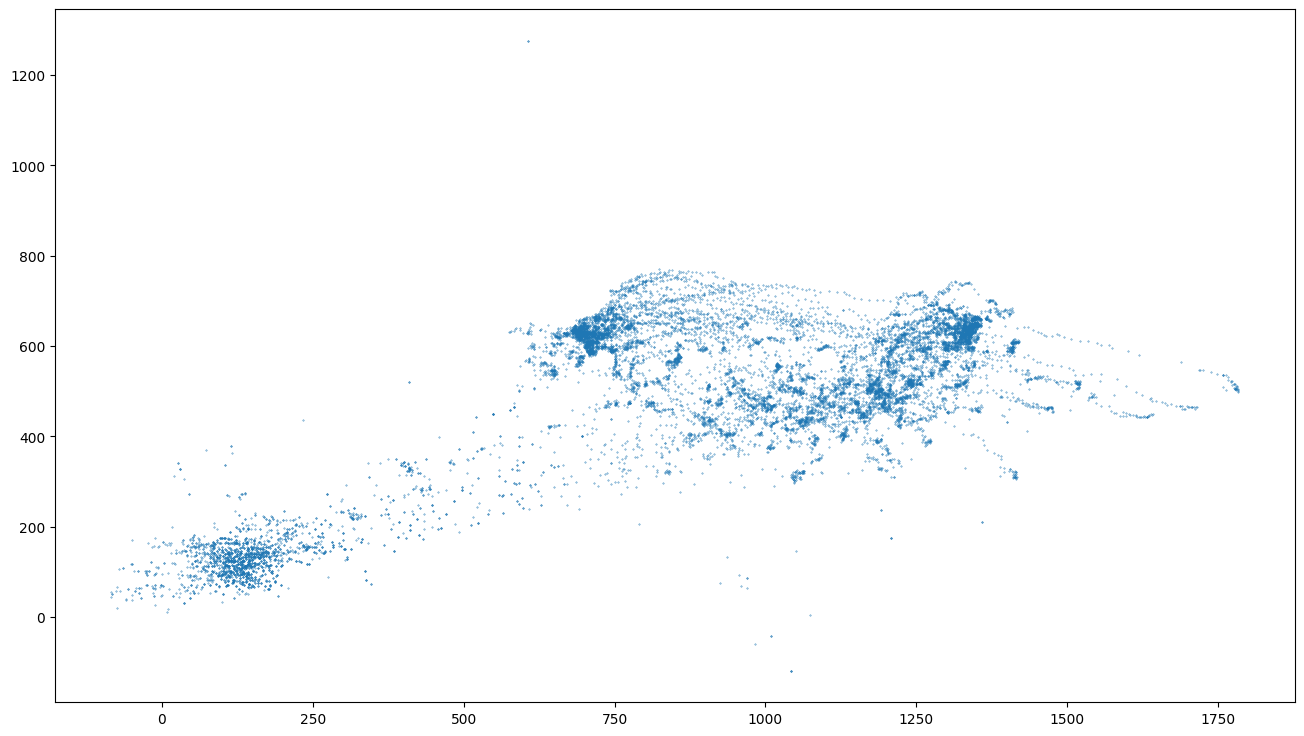

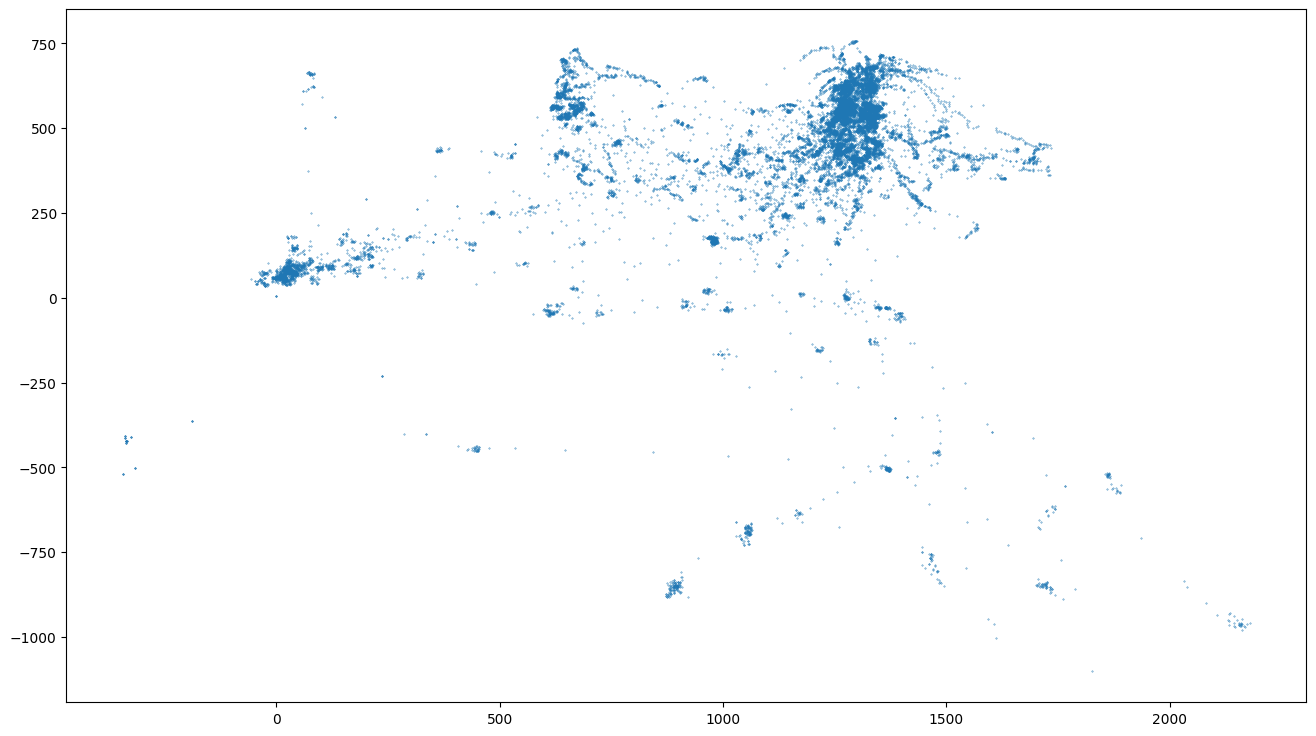

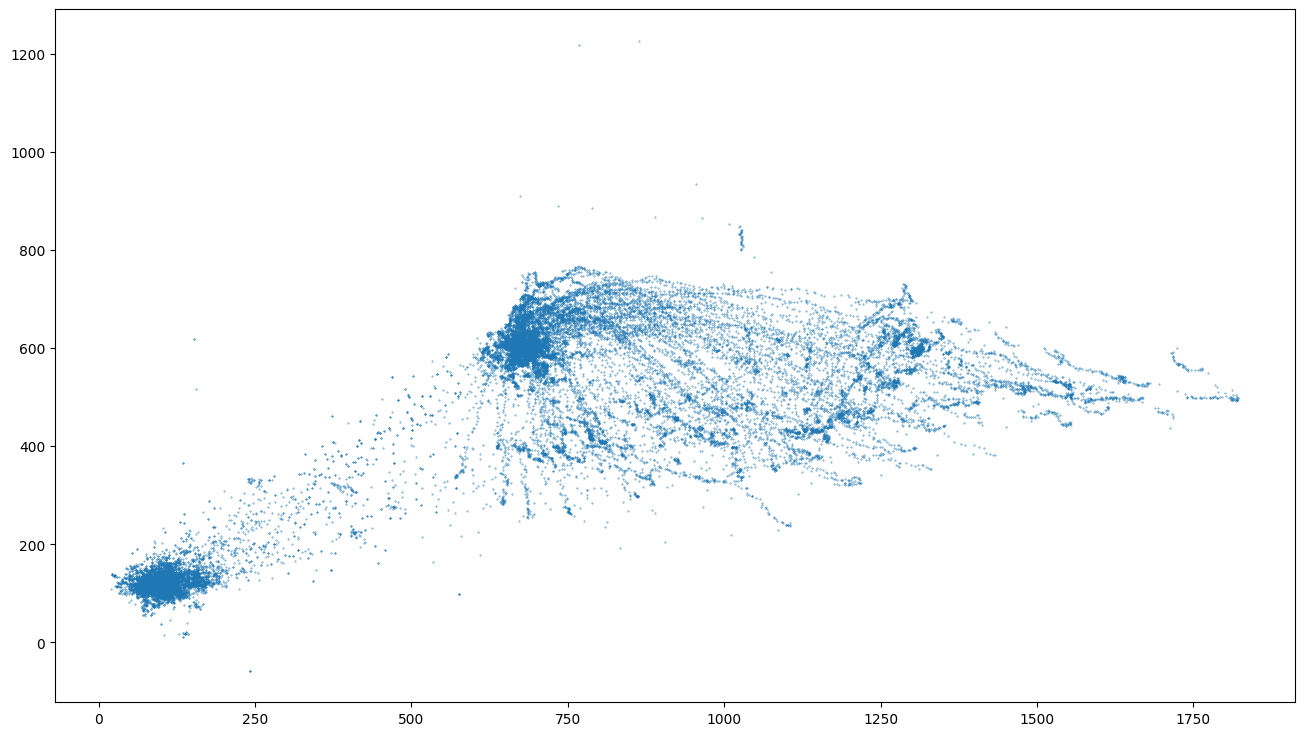

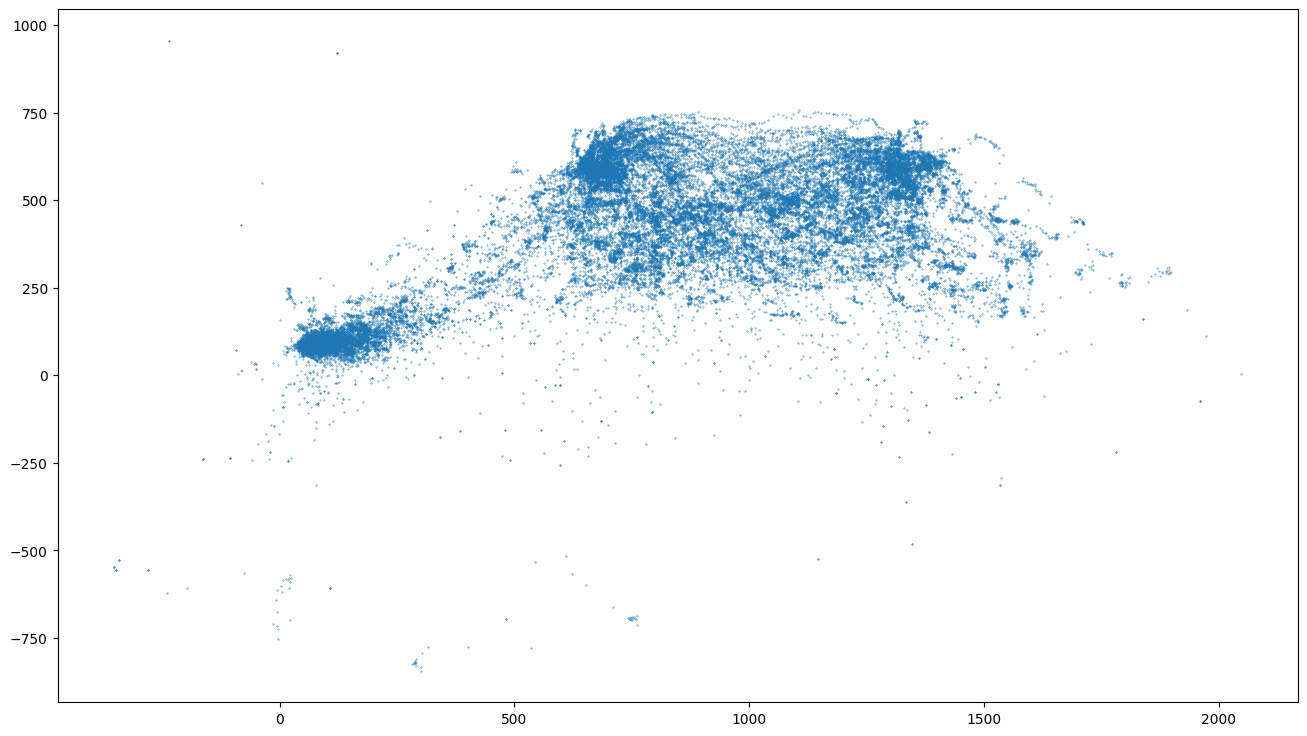

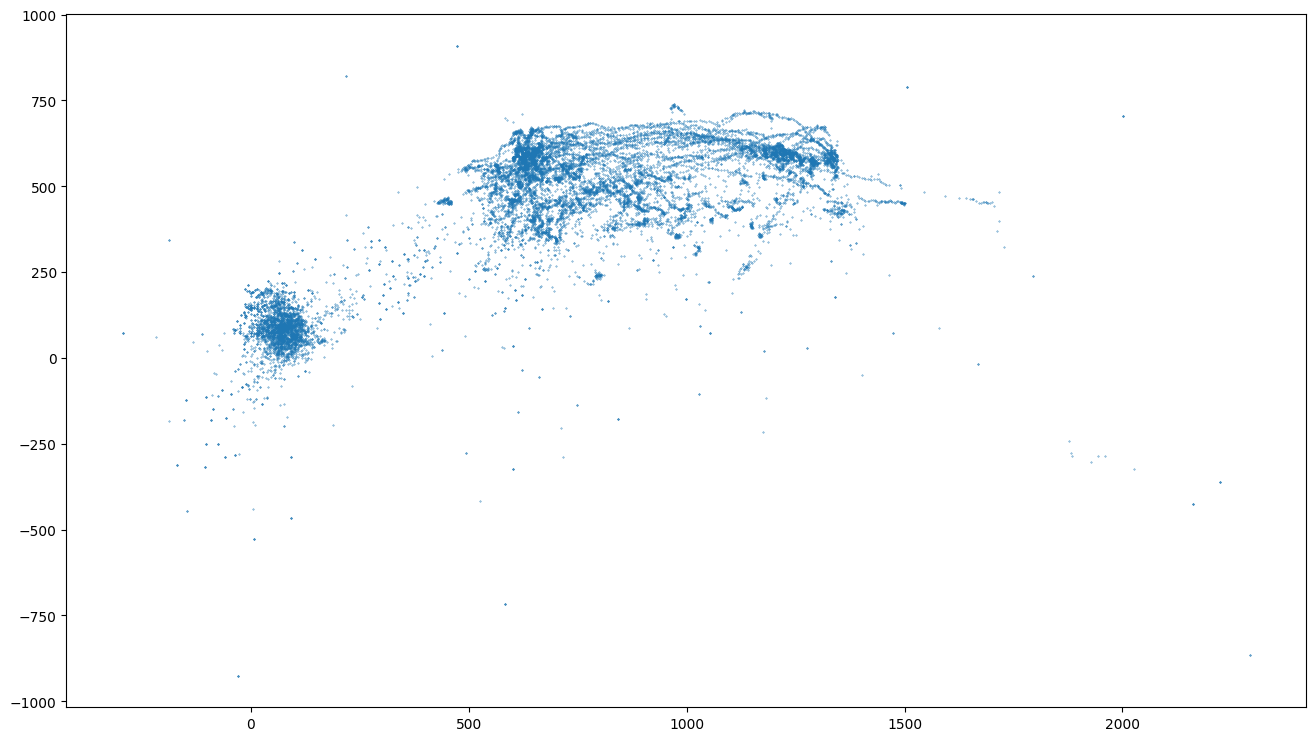

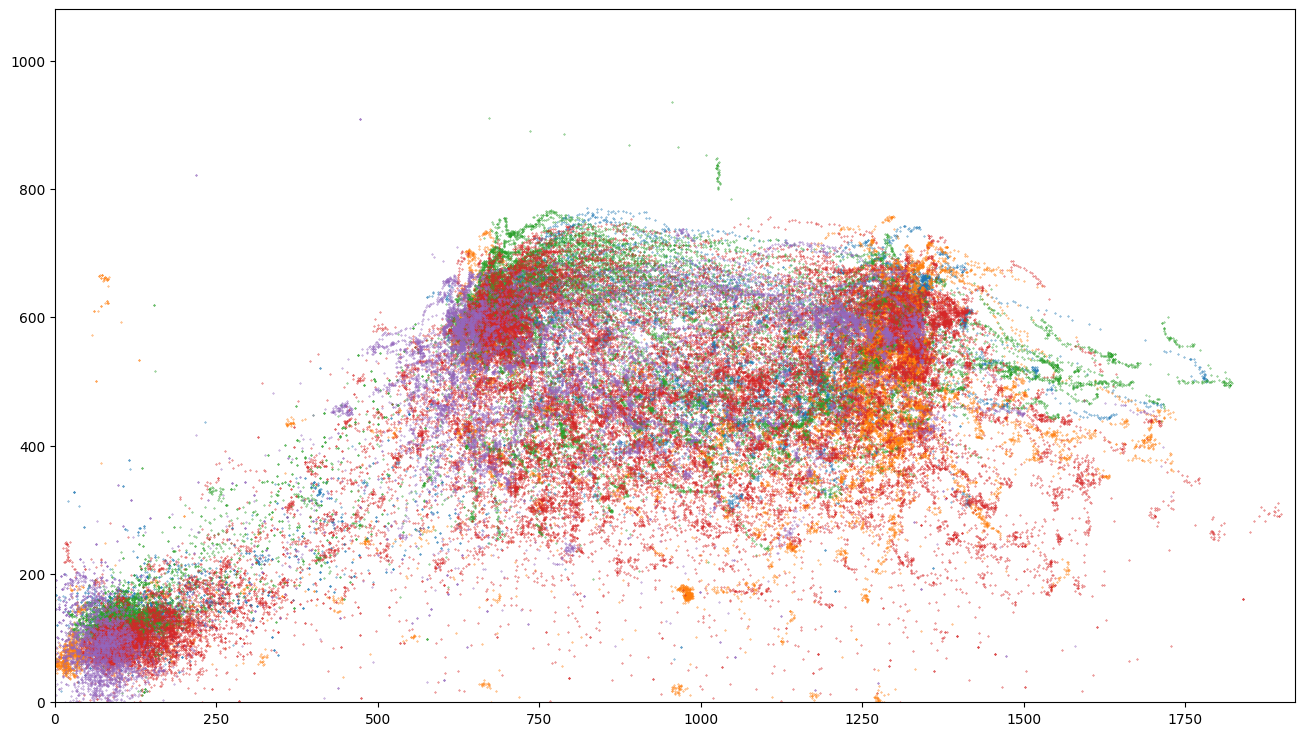

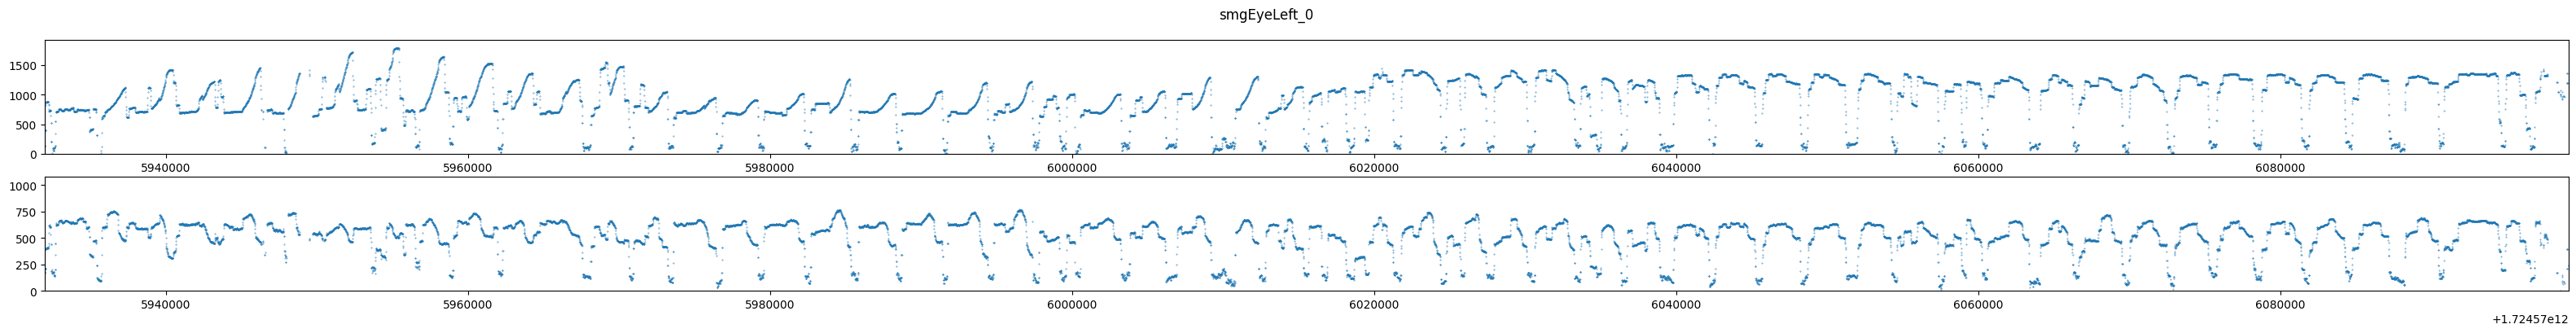

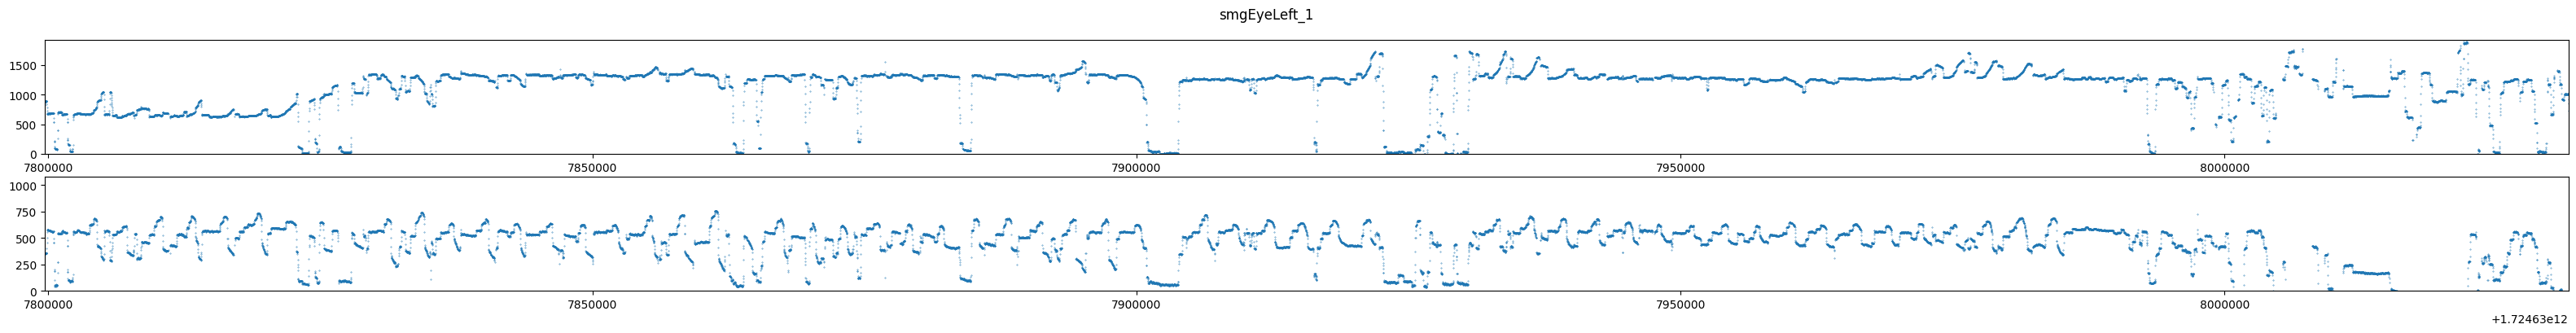

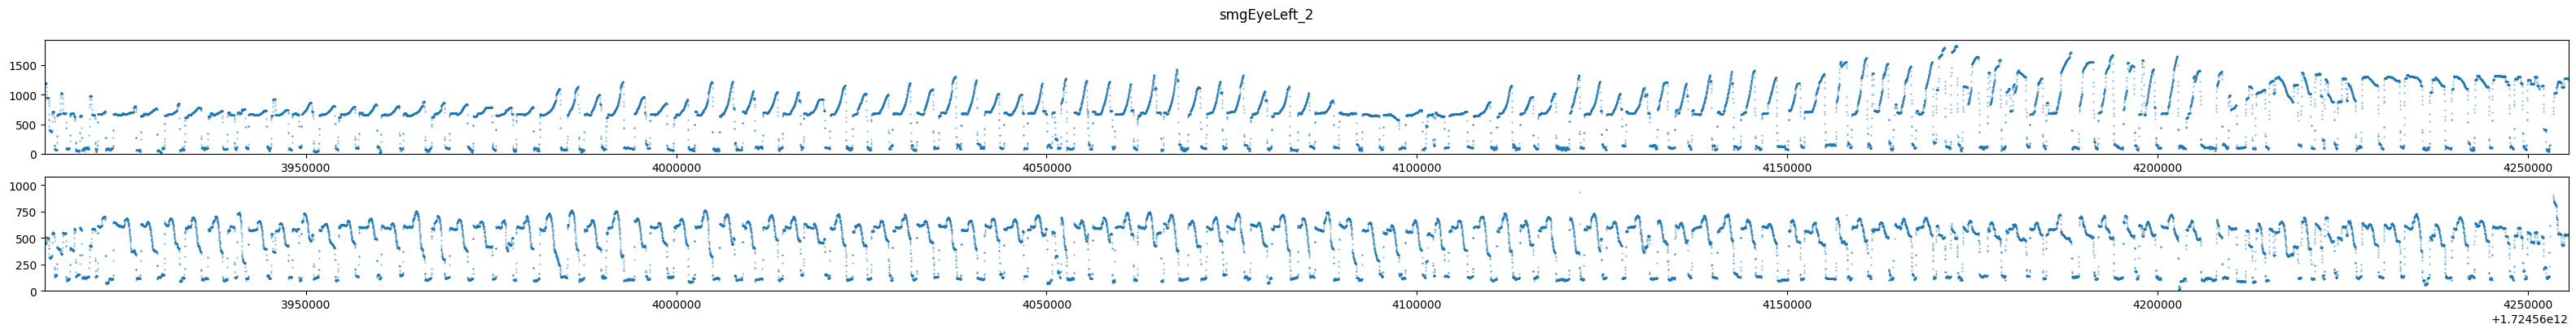

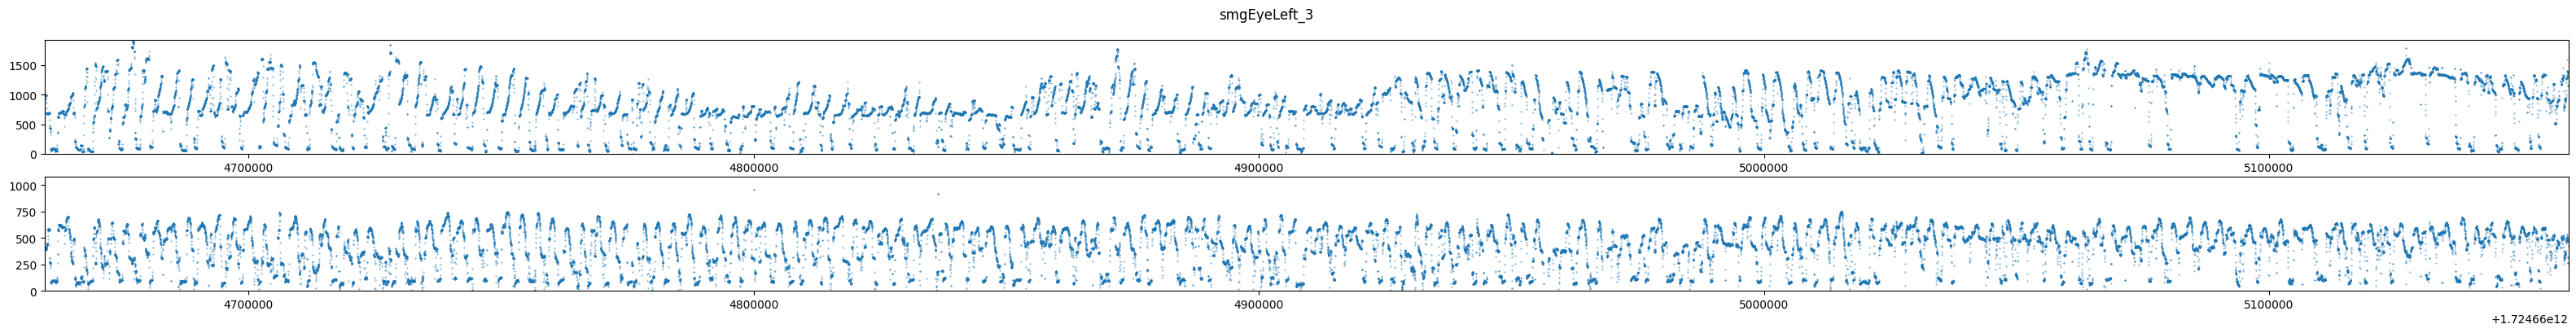

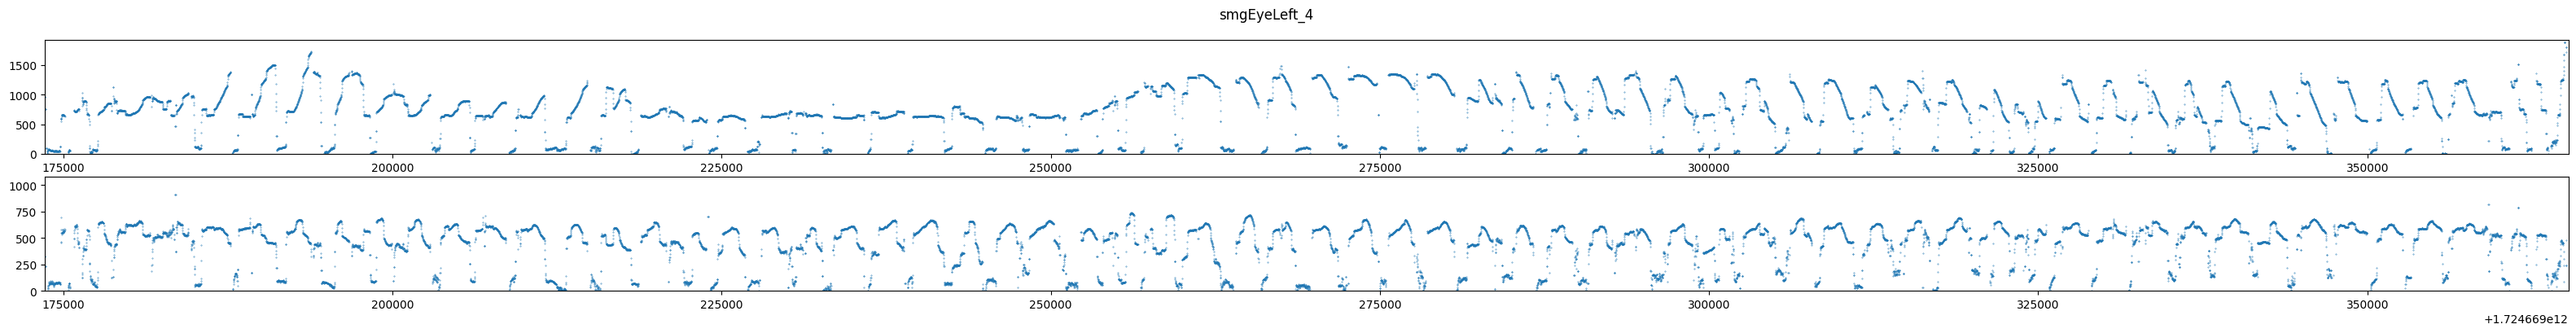

In [11]:
for individual in range(len(smog_eye)):
    data = defineData(individual)
    toplt = data
    plotL(toplt)

print(data.head())
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(16,9))
for individual in range(len(smog_eye)):
    print('#',individual,': ')
    data = rawdata(individual)
    toplt = data
    print('maxLX(px): ',max(toplt['L_X']),' ','minLX(px): ', min(toplt['L_X']))
    print('maxLY(px): ',max(toplt['L_Y']),' ','minLY(px): ', min(toplt['L_Y']))
    ax.scatter(toplt['L_X'],toplt['L_Y'],s=0.1)
    ax.set_xlim(0,1920)
    ax.set_ylim(0,1080)
import matplotlib.pyplot as plt
#import mpld3

def plotwithTime(toplt,title='plot'):
    fig, ax = plt.subplots(2,1, figsize=(40, 4))
    #mpld3.enable_notebook()
    ax[0].scatter(toplt['SystemTimeStamp'],toplt['L_X'],s=0.1)
    ax[1].scatter(toplt['SystemTimeStamp'],toplt['L_Y'],s=0.1)
    ax[0].set_xlim(min(toplt['SystemTimeStamp']),max(toplt['SystemTimeStamp']))
    ax[0].set_ylim(0,1920)
    ax[1].set_xlim(min(toplt['SystemTimeStamp']),max(toplt['SystemTimeStamp']))
    ax[1].set_ylim(0,1080)
    fig.suptitle(title)
    return fig

print(data.head())
for individual in range(len(smog_eye)):
    data = defineData(individual)
    toplt = data
    plotwithTime(toplt,title=f'smgEyeLeft_{individual}')

In [12]:
for individual in range(len(smog_eye)):
    i = smog_frame[individual]['filename'][46:52]
    print(i)
    #d = splitXYca(individual,1)
    #print(d.shape)
    #savedata(f'splitXYca_{i}.csv',d)
#保存frame文件以另一种格式 并且查看文件名是否合适


HY-08-
Jia-08
Lin-08
Xiaoch
Ziyi-0


KeyError: 'pany3'

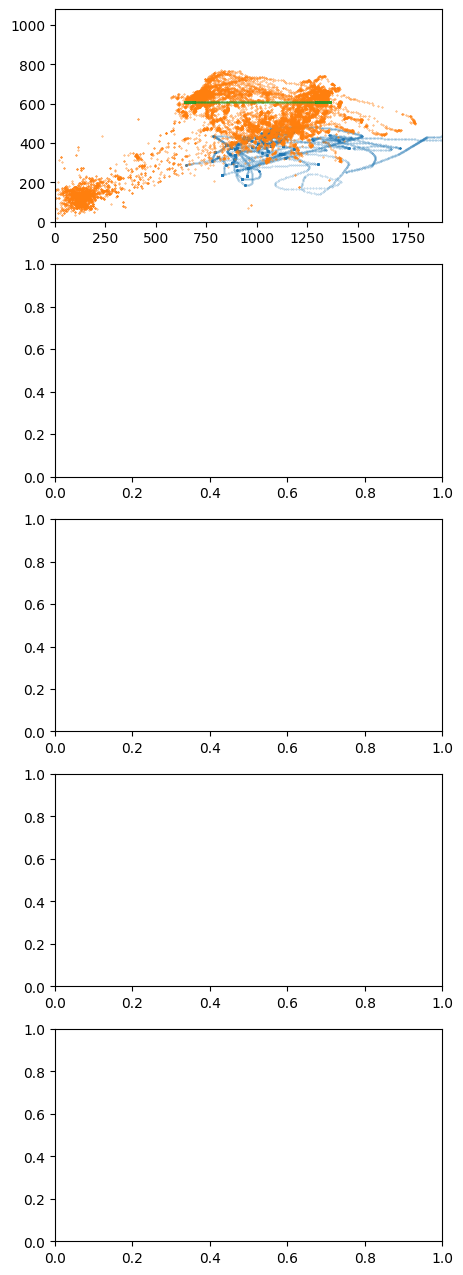

In [13]:

import matplotlib.pyplot as plt
def eyemarkerplot(individual,ax,Xi,Xci,Xpi):#Xi <= 5;Xci<=2;Xpi<=6
    toplt = splitXYtar(individual,Xi)
    ax.scatter(toplt[f'tarx{Xi}'],toplt[f'tary{Xi}'],s=0.1,label='target',alpha=0.5) 
    ax.set_xlim(0,1920)
    ax.set_ylim(0,1080)

    toplt= rawdata(individual)
    ax.scatter(toplt['L_X'],toplt['L_Y'],s=0.1,label='left eye')

    toplt = splitXYca(individual,Xci) 
    ax.scatter(toplt[f'cax{Xci}'],toplt[f'cay{Xci}'],s=0.1,label='cannon',alpha=0.5)
    
    toplt = splitXYpon(individual,Xpi)
    ax.scatter(toplt[f'ponx{Xpi}'],toplt[f'pany{Xpi}'],s=0.1,label='pon',alpha=0.5)
    ax.legend()

num=5
fig, ax = plt.subplots(num,1, figsize=(5, 16))
for i in range(0,num):
    eyemarkerplot(individual=i,ax=ax[i],Xi=3,Xci=1,Xpi=3)
plt.tight_layout()
plt.show()


In [ ]:
LorR = 1
fixation = NH[LorR]['df']['fixation']

import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,len(smog_eye), figsize=(25, 6))
fig2,ax2 = plt.subplots(1,len(smog_eye), figsize=(25, 3))
for individual in range(len(smog_eye)):
    print(f'individual {individual}: ',len(NH[LorR]['df']['time'][individual]))
    print(NH[LorR]['df']['filename'][individual],' ',smog_eye[individual]['df'].shape)  
    print(f'...{smog_frame[individual]['filename'][44:50]}...')
    df = pd.DataFrame(fixation[individual])
    data = df['duration'].copy()
    ax[individual].hist(data,bins = 50)
    ax[individual].set_title(f'fixationDuration{individual}')
    data = df['meanX_pix']
    data2 = df['meanY_pix']
    ax2[individual].scatter(data,data2,s=0.1)
    ax2[individual].set_title(f'fixationPos{individual}')
    ax2[individual].set_xlim(0,1920)
    ax2[individual].set_ylim(0,1080)


In [ ]:
LorR = 1

fig,ax = plt.subplots(1,len(smog_eye), figsize=(25, 6))
fig2,ax2 = plt.subplots(1,len(smog_eye), figsize=(25, 4))
fig3,ax3 = plt.subplots(1,len(smog_eye), figsize=(25, 6))
for individual in range(len(smog_eye)):
    saccade = pd.DataFrame(NH[LorR]['df']['saccade'][individual])
    data = saccade['duration'].copy()
    ax[individual].hist(data,bins = 30)
    ax[individual].set_title(f'saccadeDuration{individual}')
    ax2[individual].set_xlim(0,0.35)
    ax2[individual].set_ylim(0,200)
    data = saccade['startPointAzi'].copy()
    data2 = saccade['startPointEle'].copy()
    ax2[individual].scatter(data,data2,s=0.1,color = 'blue')
    ax2[individual].set_title(f'saccadeStart{individual}')
    data = saccade['endPointAzi'].copy()
    data2 = saccade['endPointEle'].copy()
    ax2[individual].scatter(data,data2,s=0.1,color = 'orange')
    ax2[individual].set_xlim(-40,40)
    ax2[individual].set_ylim(-40,40)
    ax2[individual].set_xlabel('azimuth')
    ax2[individual].set_ylabel('elevation')
    data = saccade['amplitude'].copy()
    ax3[individual].hist(data,bins = 50)
    ax3[individual].set_title(f'saccadeAmplitude{individual}')
    ax3[individual].set_xlim(0,40)
    ax3[individual].set_ylim(0,100)


In [ ]:

import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

def sacEvent(saccadeOnOffL,saccadeOnOffR,frame,a=0,b=1):
    fig = plt.figure(figsize=(20, 4))
    plt.eventplot(saccadeOnOffL[saccadeOnOffL['sac_on'] == 1]['time'],linelengths=0.1,colors='salmon', lineoffsets=0.2)
    plt.eventplot(saccadeOnOffR[saccadeOnOffR['sac_on'] == 1]['time'],linelengths=0.1,colors='lawngreen', lineoffsets=0.4)
    plt.eventplot(saccadeOnOffL[saccadeOnOffL['sac_off'] == 1]['time'],linelengths=0.1,colors='brown', lineoffsets=0.3)
    plt.eventplot(saccadeOnOffR[saccadeOnOffR['sac_off'] == 1]['time'],linelengths=0.1,colors='olivedrab', lineoffsets=0.5)
    plt.eventplot(frame['timeStamp'],linelengths=0.1,colors='steelblue', lineoffsets=0.1)
    plt.xlim(saccadeOnOffL['time'].min()-100+a*(saccadeOnOffL['time'].max()-saccadeOnOffL['time'].min()),saccadeOnOffL['time'].min()+b*(saccadeOnOffL['time'].max()-saccadeOnOffL['time'].min()))
    plt.ylim(0,1)
    plt.suptitle(f'saccade{individual}')


for individual in range(len(smog_frame)):
    saccadeOnOffL = timesaconoff(individual)[0]['df']
    saccadeOnOffR = timesaconoff(individual)[1]['df']
    
    frame = framehub[individual]['df']
    sacEvent(saccadeOnOffL,saccadeOnOffR,frame,a=0.01,b=0.03)


In [ ]:
sacID = 0
plt.xlim(0,1920)
plt.ylim(0,1080)
plt.scatter(eyeonfix[sacID]['df']['L_X'],eyeonfix[sacID]['df']['L_Y'],s=1,label='L')
plt.scatter(eyeonfix[sacID]['df']['R_X'],eyeonfix[sacID]['df']['R_Y'],s=1,label='R')
plt.scatter(frameforfix[sacID]['df']['tarx1'],frameforfix[sacID]['df']['tary1'],s=1,label='target')
plt.legend()

In [ ]:
# split trials by whether pon shows up or not
individual = 3
frame_all = framehub[individual]['df'].copy()
frame_all['pon'] = frame_all['ponx1'].notnull()
frame_withpon = frame_all[(frame_all['pon'] == True) &
                           (frame_all['ponx1']<=1920)& 
                           (frame_all['pony1']<=1080)]
mask = (frame_withpon['frameTag']+1) != frame_withpon['frameTag'].shift(-1) # -1 is the next
break_label = frame_all.loc[mask[mask==True].index,'timeStamp']
framebreak = frame_all.loc[mask[mask==True].index]
print('num of break label:',len(break_label))

# merge eyedata with framebreak
data = rawdata(individual).copy()
data['timeStamp'] = data['SystemTimeStamp']
data = pd.merge(how ='outer',right=data,left=framebreak,on='timeStamp')
data.sort_values(by='timeStamp',inplace=True)
break_label = data.loc[data['frameTag'].notna(),'frameTag'].index.to_list()
data.drop(columns=['timeStamp','frameTag',
                     'ponx1','pony1','tarx1','tary1','pon'],inplace=True)
eye_perbreak = []

for i in range(len(break_label)-1): 
    a = break_label[i]
    b = break_label[i+1]
    data_i = {'df':data.loc[a:b],'ID':i+1}
    eye_perbreak.append(data_i)
#create new files for NH2010
    strcustom = smog_eye[individual]['filename']
    strcustom = f'smogEye_{strcustom[44:50]}_{data_i['ID']}.txt'
    savedata(strcustom,data_i['df'] )
# 产生用于matlab runNH2010 的文件

num of break label: 23


In [ ]:
#产生用于matlab runNH2010 的文件
for individual in range(len(smog_eye)):
    datatosave = defineData(individual)
    strcustom = smog_eye[individual]['filename']
    strcustom = f'smogEye_{strcustom[44:50]}.txt'
    savedata(strcustom,datatosave.copy())

In [ ]:
import PyTrack
import multimatch_gaze as m
data = {
    'Timestamp'
    'StimulusName'
    'EventSource'
    'GazeLeftx'
    'GazeRightx'
    'GazeLefty'
    'GazeRighty'
    'PupilLeft'
    'PupilRight'
    'FixationSeq'
    'SaccadeSeq'
    'Blink'
    'GazeAOI'
}